In [1]:
import  VARmodel

In [2]:
import loadDataForSKtime

loader = loadDataForSKtime.PatientTimeSeriesLoader(
    "C:/Users/emily/Documents/DissertationProject/training/training_setA_csv", ['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])
df = loader.load_data(10)
train_data, test_data = loader.split_train_test(df)


<class 'list'>
Patient 1: Dropping — constant columns found
Patient 5: Dropping — constant columns found
Patient 6: Dropping — constant columns found


In [10]:
df

HR  O2Sat    SBP    MAP   DBP  Resp   Temp
Patient_ID ICULOS                                               
2          1        -1.0   -1.0   -1.0  -1.00  -1.0  -1.0  -1.00
           2        61.0   99.0  124.0  65.00  43.0  17.5  36.44
           3        64.0   98.0  125.0  64.00  41.0  27.0  -1.00
           4        56.0  100.0  123.0  65.00  41.0   9.0  -1.00
           5        66.0   99.0  120.0  67.00  43.0  23.0  -1.00
...                  ...    ...    ...    ...   ...   ...    ...
4          25      109.0   98.0  114.0  67.33  -1.0  14.0  -1.00
           26      111.0   99.0  116.0  64.67  -1.0  16.0  -1.00
           27      110.0   99.0  121.0  67.67  -1.0  23.0  36.72
           28      108.0   98.0  115.0  67.67  -1.0  19.0  -1.00
           29       -1.0   -1.0   -1.0  -1.00  -1.0  -1.0  -1.00

[100 rows x 7 columns]

In [3]:
VARforecaster = VARmodel.VARForecaster(train_data, test_data, ['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Resp', 'Temp'])

In [4]:
VARforecaster.fit()
VARforecasts = VARforecaster.predict(steps=6)

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\emily\Documents\DissertationProject\venv_py

In [13]:
VARforecasts

HR       O2Sat          SBP         MAP  \
Patient_ID ICULOS                                                    
2          18      171.176837  108.968097   485.274444  240.446727   
           19      -60.769534   85.888411  -274.308747 -126.147436   
           20      223.394492  115.845614   677.275379  332.817162   
           21     -147.285577   72.612998  -580.352054 -261.181618   
           22      350.995182  129.160896  1114.002942  533.330476   
           23     -324.824378   54.079897 -1184.576543 -546.620298   
3          43       72.394578   81.337805   140.984189   87.716555   
           44       71.223897   81.734393   135.343194   82.171242   
           45       72.601675   84.184121   135.094310   80.521442   
           46       74.018610   86.141738   135.692683   80.100345   
           47       74.445488   86.619041   135.138209   79.275678   
           48       74.830279   87.032246   134.860489   78.831155   
4          24      104.039175   97.490663    58.183281   31.881651   
           25      104.784424   98.579310    93.519886   55.985569   
           26      104.032480   97.913267    87.397730   52.511582   
           27      104.525503   98.114688    89.903604   52.675240   
           28      104.537535   98.116961    86.918833   51.339154   
           29      104.559860   98.155524    88.369247   52.251079   

                          DBP       Resp        Temp  
Patient_ID ICULOS                                     
2          18      176.525205  10.403367  218.709099  
           19     -105.634545  40.368749 -285.258646  
           20      238.638055 -20.859384  338.771774  
           21     -215.904498  51.846553 -418.180344  
           22      399.088868 -37.730565  602.315964  
           23     -435.473346  84.743349 -796.224556  
3          43       58.253439  27.627940   13.856566  
           44       53.262165  24.964908   10.175344  
           45       51.518047  24.760869   11.402370  
           46       50.757349  24.582183   11.273432  
           47       50.187252  24.441880   11.616368  
           48       49.851164  24.353102   11.665414  
4          24       -1.457873  16.525127    1.402045  
           25        0.713783  20.809165    9.424134  
           26        1.255482  17.529665    8.051710  
           27        1.259105  18.192461    9.579033  
           28        1.740482  18.175089    8.874665  
           29        2.163680  18.458525    8.953130

In [8]:
VARforecaster.evaluate_model(VARforecasts)

Mean Absolute Error: 289.28412517324244


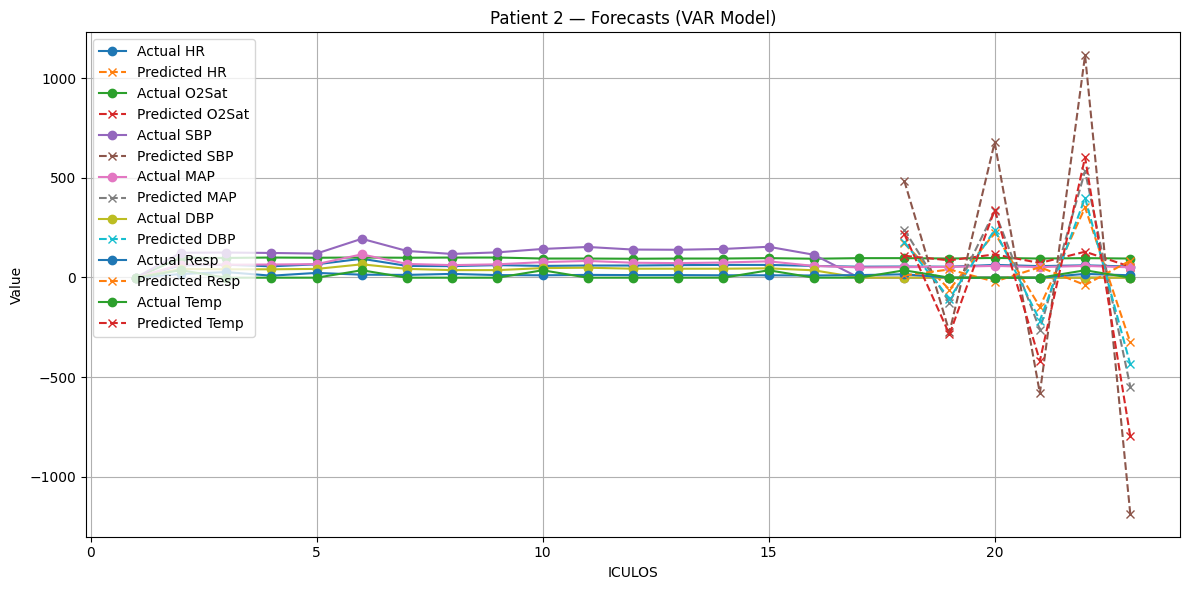

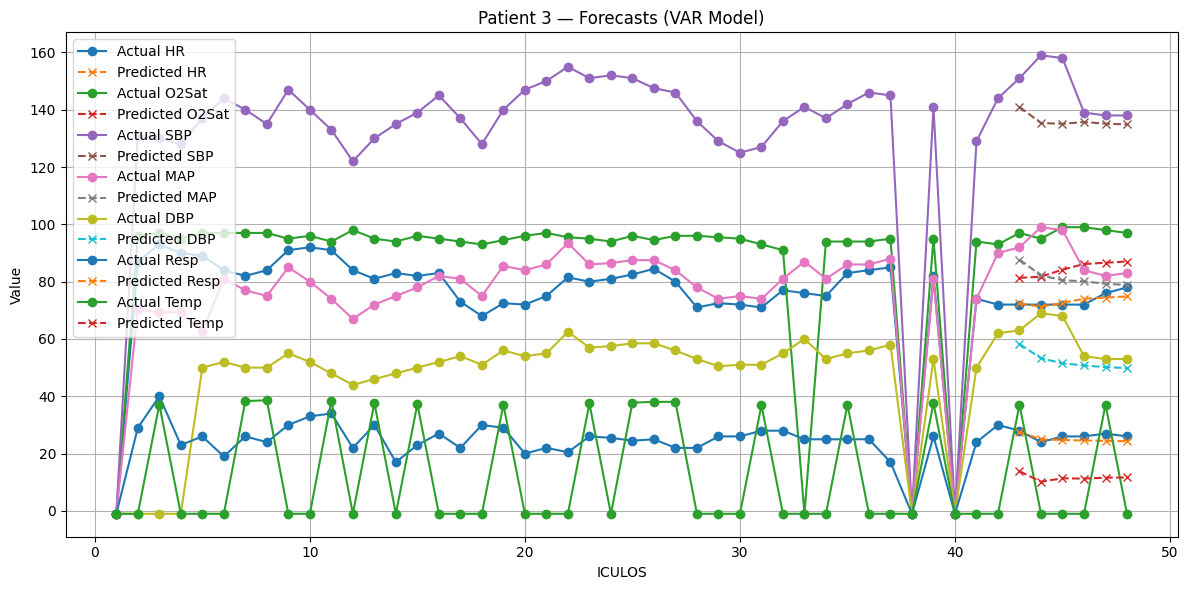

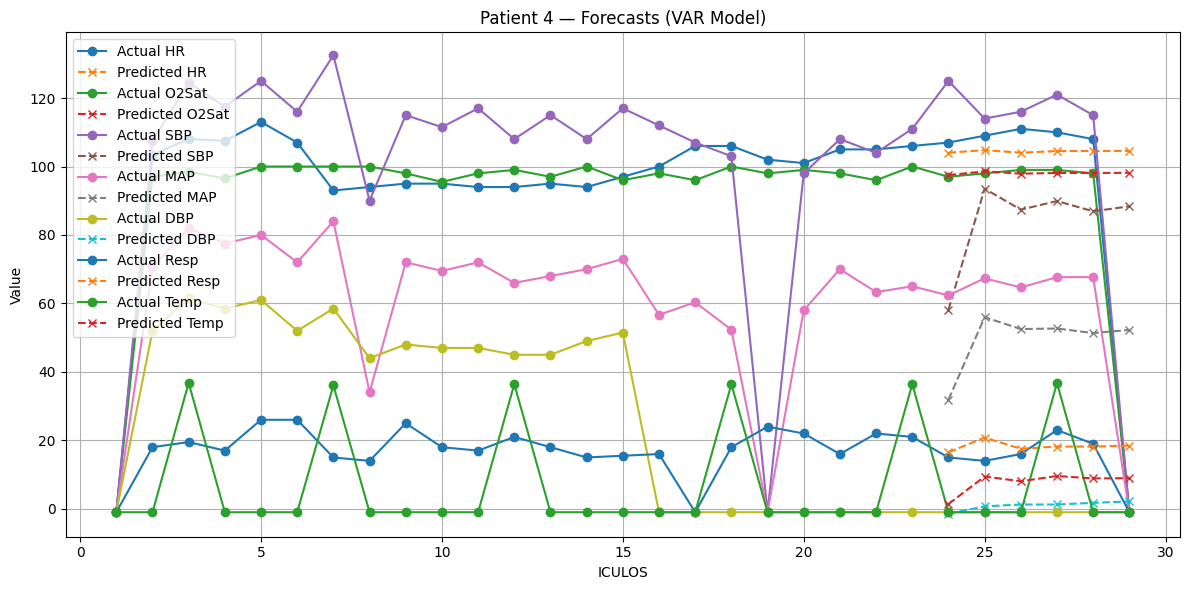

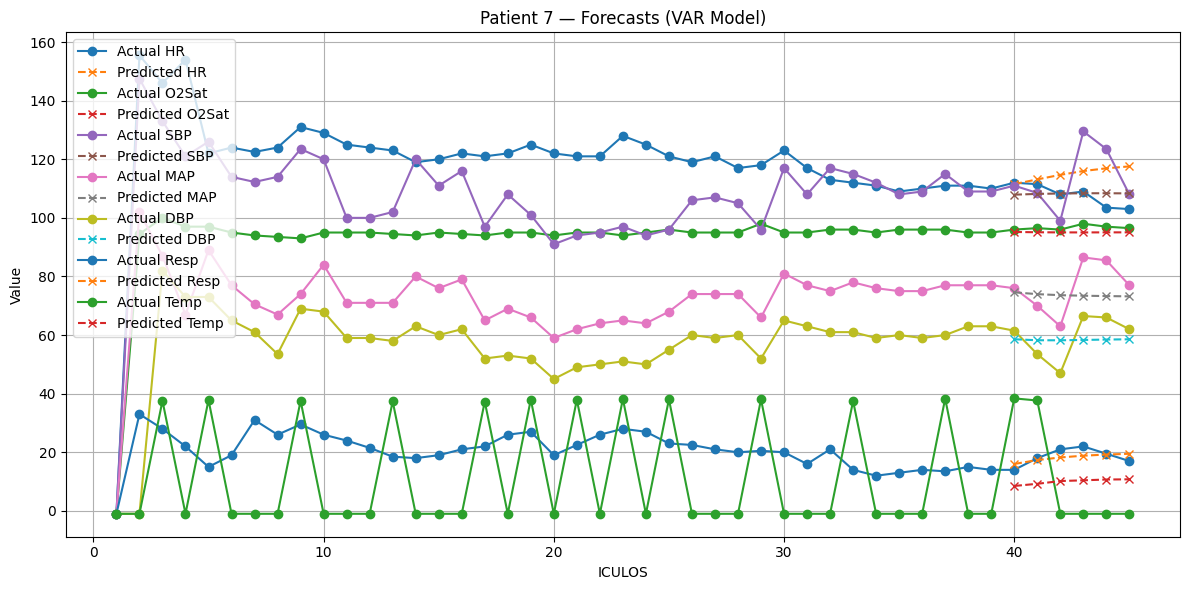

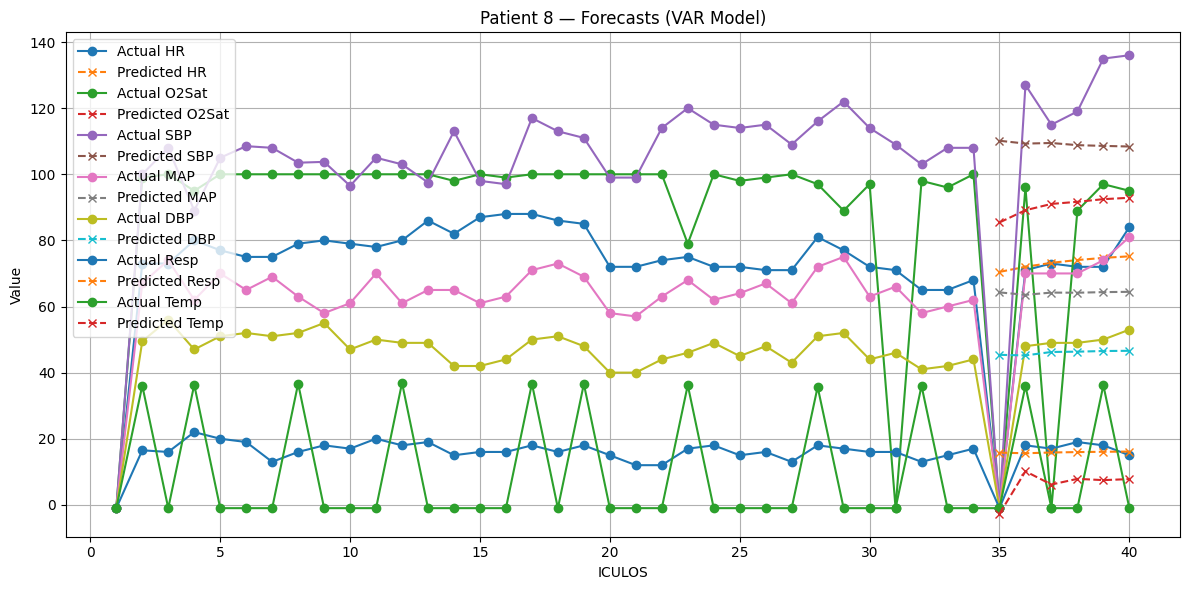

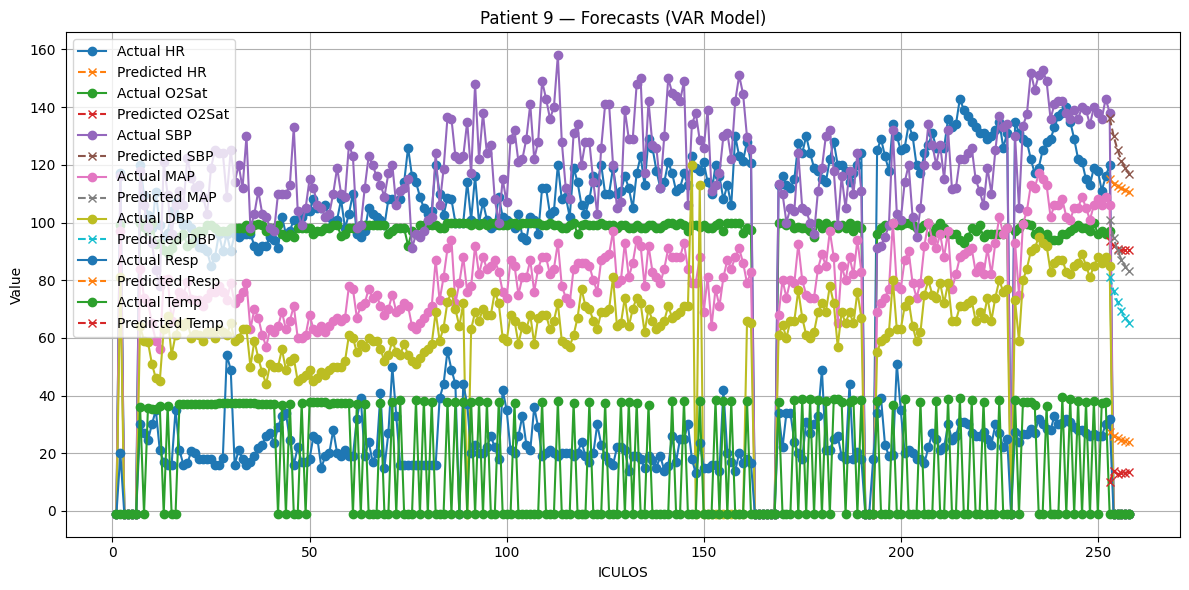

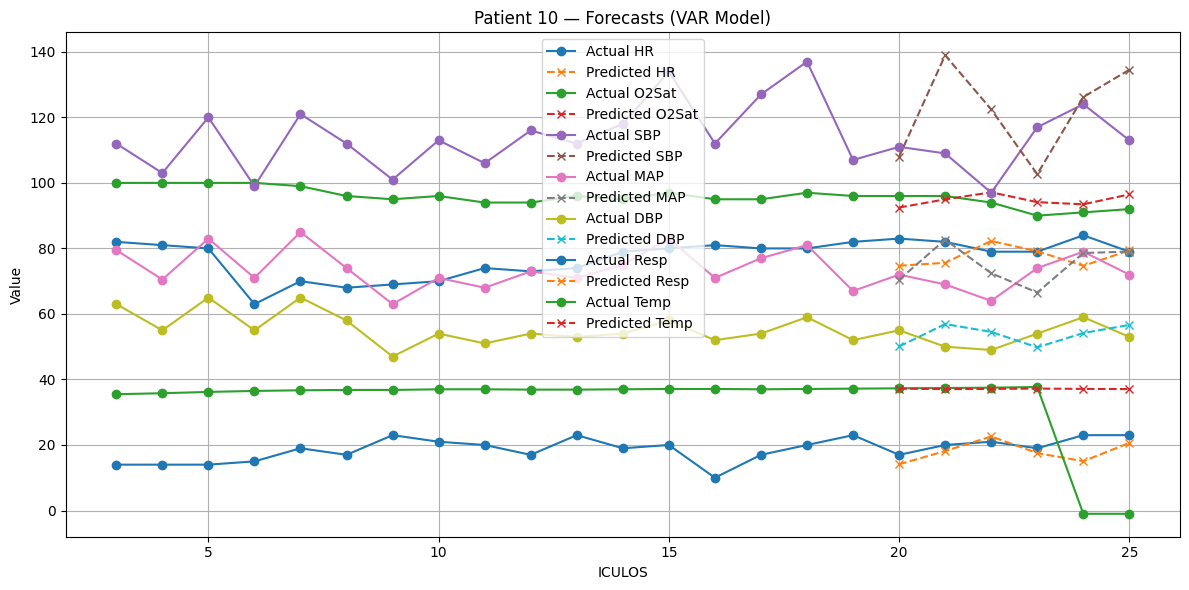

In [5]:
for patient_id in range(1, 20):
    if patient_id in VARforecasts.index.get_level_values("Patient_ID"):
        VARforecaster.plot_forecast(VARforecasts, patient_id)

In [10]:
train_data

HR  O2Sat    SBP    MAP   DBP  Resp   Temp
Patient_ID ICULOS                                              
2          1       -1.0   -1.0   -1.0   -1.0  -1.0  -1.0  -1.00
           2       61.0   99.0  124.0   65.0  43.0  17.5  36.44
           3       64.0   98.0  125.0   64.0  41.0  27.0  -1.00
           4       56.0  100.0  123.0   65.0  41.0   9.0  -1.00
           5       66.0   99.0  120.0   67.0  43.0  23.0  -1.00
           6       94.0  100.0  194.0  116.0  66.0  14.0  36.22
           7       58.0   99.0  133.0   68.0  43.0  13.0  -1.00
           8       57.0  100.0  118.0   62.0  37.0  18.0  -1.00
           9       62.0  100.0  126.0   66.0  37.0  12.0  -1.00
           10      58.0   95.0  143.0   77.0  47.0  11.0  36.11
           11      60.0   95.0  153.0   83.0  49.0  13.0  -1.00
           12      60.0   94.0  140.0   74.0  44.0  12.0  -1.00
           13      62.0   95.0  139.0   72.0  44.0  12.0  -1.00
           14      63.0   95.0  143.0   75.0  44.0  11.0  -1.00
           15      63.0   97.0  154.0   81.0  46.0  11.0  36.11
           16      58.0   94.0  114.0   58.0  36.0  10.0  -1.00
           17      54.0   97.0   -1.0   50.5  -1.0  12.0  -1.00